<a href="https://colab.research.google.com/github/guilhermelaviola/BrazilianPresidentialElections/blob/main/BrazilianPresidentialElections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-5ddc9a2f5ebc>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [4]:
# Importing and displaying the last 10 players:
df = pd.ExcelFile('Brazilian presidential elections.xlsx')
candidates = pd.read_excel(df, 'Totals')
candidates.tail(10)

,Year,Candidate,Running mate,Candidate party,Running mate party,First round votes,First round %,Second round votes,Second round %
89,2022,Jair Bolsonaro,Walter Braga Netto,PL,PL,51072345,43.20,58206354.0,49.1
90,2022,Simone Tebet,Mara Gabrilli,PMDB,PSDB,4915423,4.16,NaN,NaN
91,2022,Ciro Gomes,Ana Paula Matos,PDT,PDT,3599287,3.04,NaN,NaN
92,2022,Soraya Thronicke,Marcos Cintra,UB,UB,600955,0.51,NaN,NaN
93,2022,Luiz Felipe d'Avila,Tiago Mitraud,NOVO,NOVO,559708,0.47,NaN,NaN
94,2022,Kelmon Souza,Luiz Cláudio Gamonal,PCO,PCO,81129,0.07,NaN,NaN
95,2022,Leonardo Péricles,Samara Martins,UP,UP,53519,0.05,NaN,NaN
96,2022,Sofia Manzano,Antonio Alves da Silva,PCB,PCB,45620,0.04,NaN,NaN
97,2022,Vera Lúcia Salgado,Kunã Yporã Tremembé,PSTU,PSTU,25625,0.02,NaN,NaN
98,2022,José Maria Eymael,João Barbosa Bravo,DC,DC,16604,0.01,NaN,NaN


In [5]:
# Displaying the number of rows and columns in the dataset:
candidates.shape

(99, 9)

In [6]:
# Displaying the last 10 rows after the datetime columns were added:
candidates.tail()

,Year,Candidate,Running mate,Candidate party,Running mate party,First round votes,First round %,Second round votes,Second round %
94,2022,Kelmon Souza,Luiz Cláudio Gamonal,PCO,PCO,81129,0.07,NaN,NaN
95,2022,Leonardo Péricles,Samara Martins,UP,UP,53519,0.05,NaN,NaN
96,2022,Sofia Manzano,Antonio Alves da Silva,PCB,PCB,45620,0.04,NaN,NaN
97,2022,Vera Lúcia Salgado,Kunã Yporã Tremembé,PSTU,PSTU,25625,0.02,NaN,NaN
98,2022,José Maria Eymael,João Barbosa Bravo,DC,DC,16604,0.01,NaN,NaN


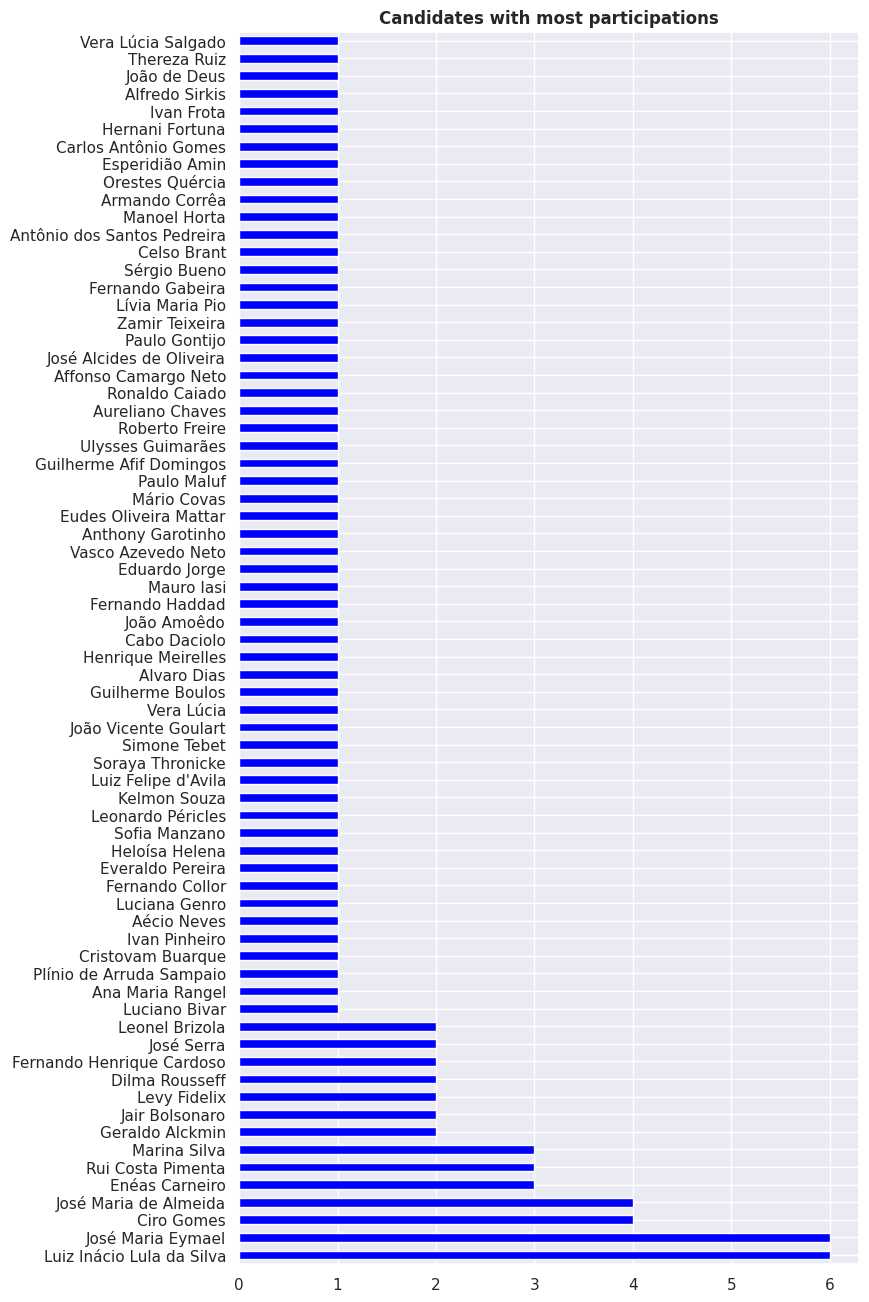

In [14]:
# Displaying the candidates with most participations in the elections:
candidates['Candidate'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Candidates with most participations', fontweight = 'bold')
plt.show()

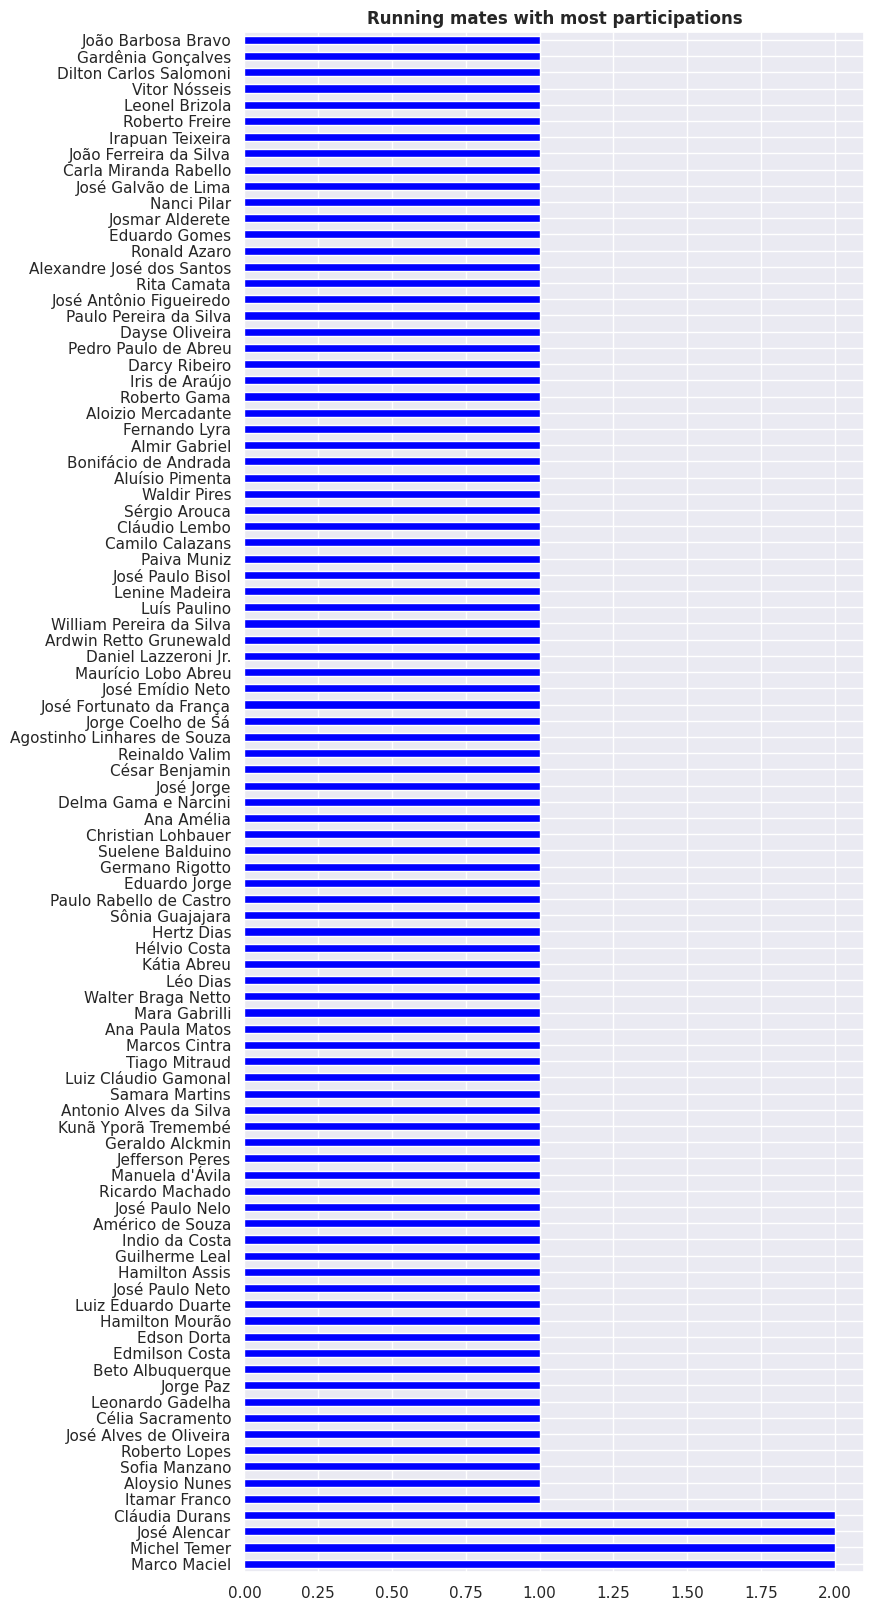

In [16]:
# Displaying the running mates with most participations in the elections:
candidates['Running mate'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Running mates with most participations', fontweight = 'bold')
plt.show()

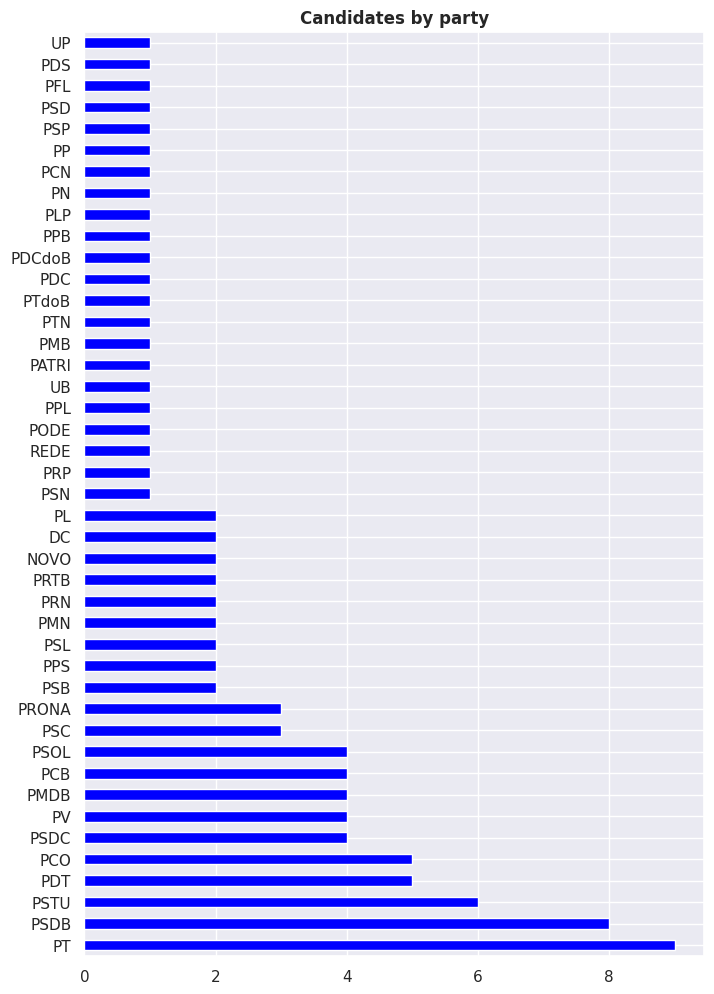

In [18]:
# Displaying the parties with most and less candidates:
candidates['Candidate party'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Candidates by party', fontweight = 'bold')
plt.show()

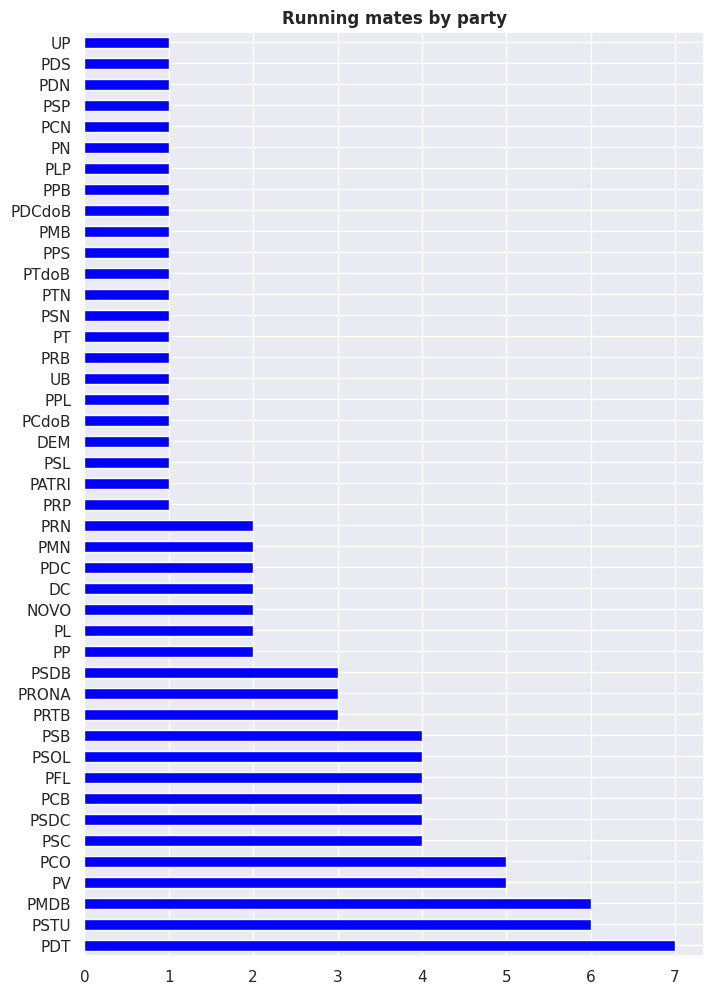

In [19]:
# Displaying the parties with most and less running mates:
candidates['Running mate party'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Running mates by party', fontweight = 'bold')
plt.show()